# Theory
Time series analysis in Python involves a toolbox of techniques to extract meaningful insights from data collected over time. Here's a theoretical overview:

**Core Concepts:**

* **Time Series Data:** A sequence of data points indexed in chronological order. Examples include stock prices, daily temperatures, or website traffic over time.

**Steps Involved:**

1. **Data Acquisition and Cleaning:**
    * Load the data using libraries like pandas.
    * Handle missing values and ensure data integrity.

2. **Exploratory Data Analysis (EDA):**
    * Visualize the time series to identify trends, seasonality, and potential outliers.
    * Calculate descriptive statistics like mean, standard deviation, and autocorrelation.

3. **Stationarity Check:**
    * A time series is considered stationary if its statistical properties (mean, variance) are constant over time. This is crucial for many forecasting models.
    * Techniques like differencing (removing trends) or transformations might be needed to achieve stationarity.

4. **Model Building:**
    * Select a suitable forecasting model based on the data characteristics:
        * **ARIMA (Autoregressive Integrated Moving Average):** Powerful model for stationary data with trends and seasonality.
        * **Exponential Smoothing:** Simpler model for short-term forecasting, assigning weights to past observations.
        * **Prophet:** Facebook's forecasting tool good for handling holidays, seasonality, and other effects.

5. **Model Training and Evaluation:**
    * Train the model on a portion of the data.
    * Evaluate its performance on unseen data using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).

6. **Forecasting:**
    * Use the trained model to predict future values of the time series.

**Popular Python Libraries:**

* **pandas:** For data manipulation, analysis, and visualization.
* **statsmodels:** Provides tools for time series analysis, including ARIMA modeling.
* **scikit-learn:** Offers functionalities for machine learning tasks, including some time series models.
* **Prophet:** Specifically designed for time series forecasting.

**Advantages of using Python:**

* **Rich ecosystem of libraries:** Provides powerful tools for data analysis, model building, and visualization.
* **Open-source and free:** Accessible to a wide range of users.
* **Versatility:** Applicable to various time series analysis problems.

By understanding these theoretical concepts and leveraging Python's libraries, you can effectively analyze time series data to uncover hidden patterns, make informed predictions, and gain valuable insights from your data.

In [1]:
import numpy as np 
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization



In [2]:
df = pd.read_csv(r"Your/File/Path/AirPassengers.csv")

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Visualize the Time Series 

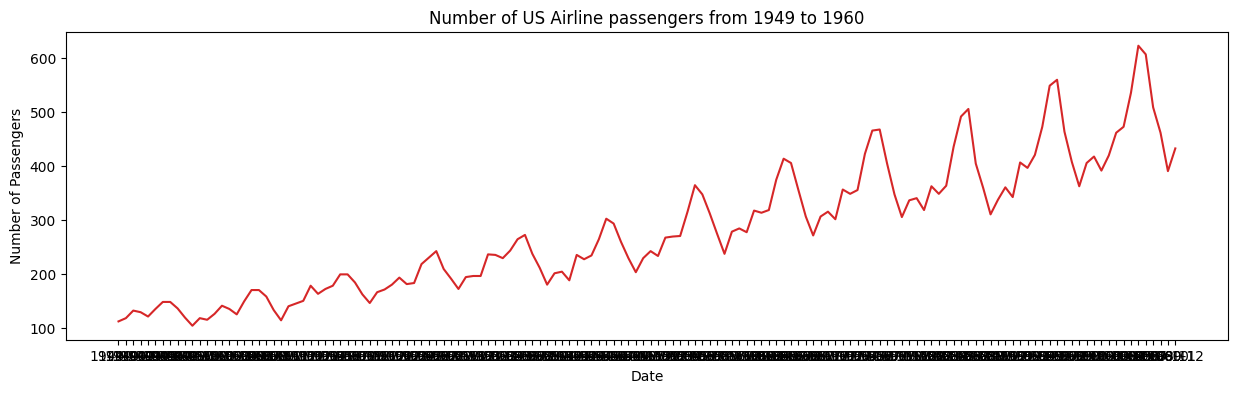

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

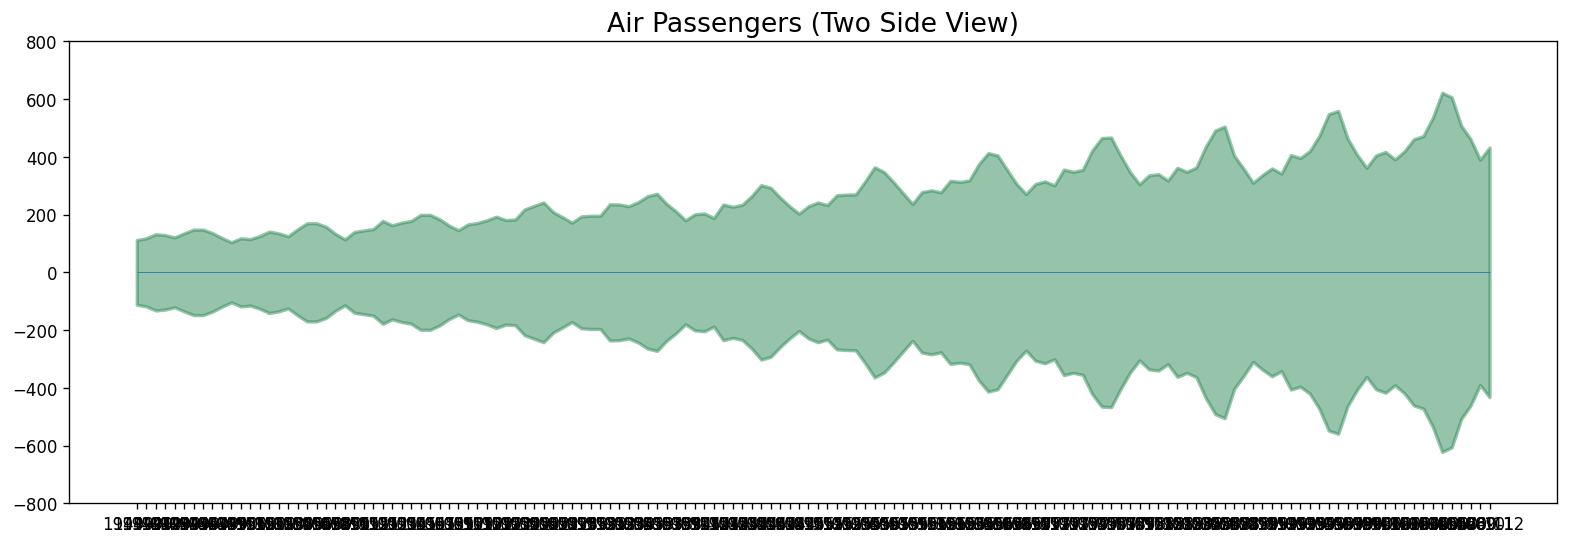

In [5]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

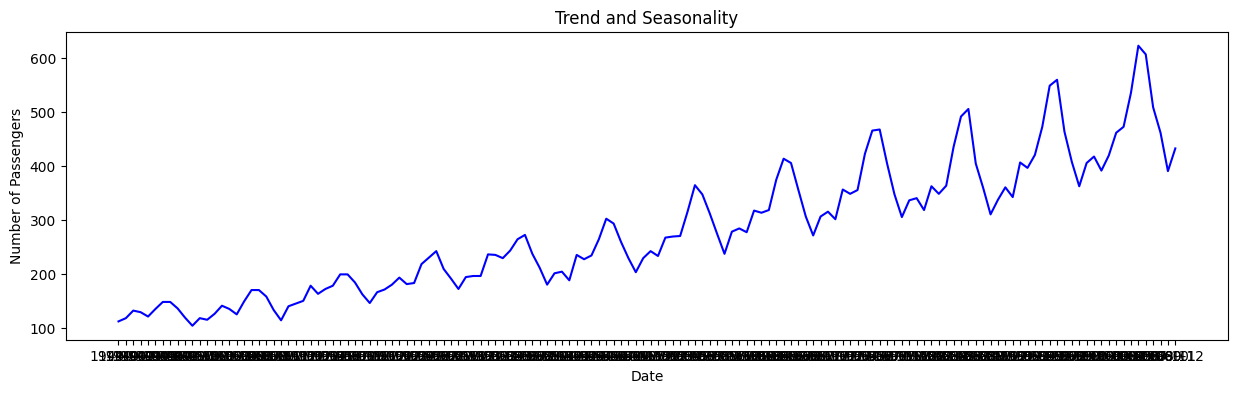

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

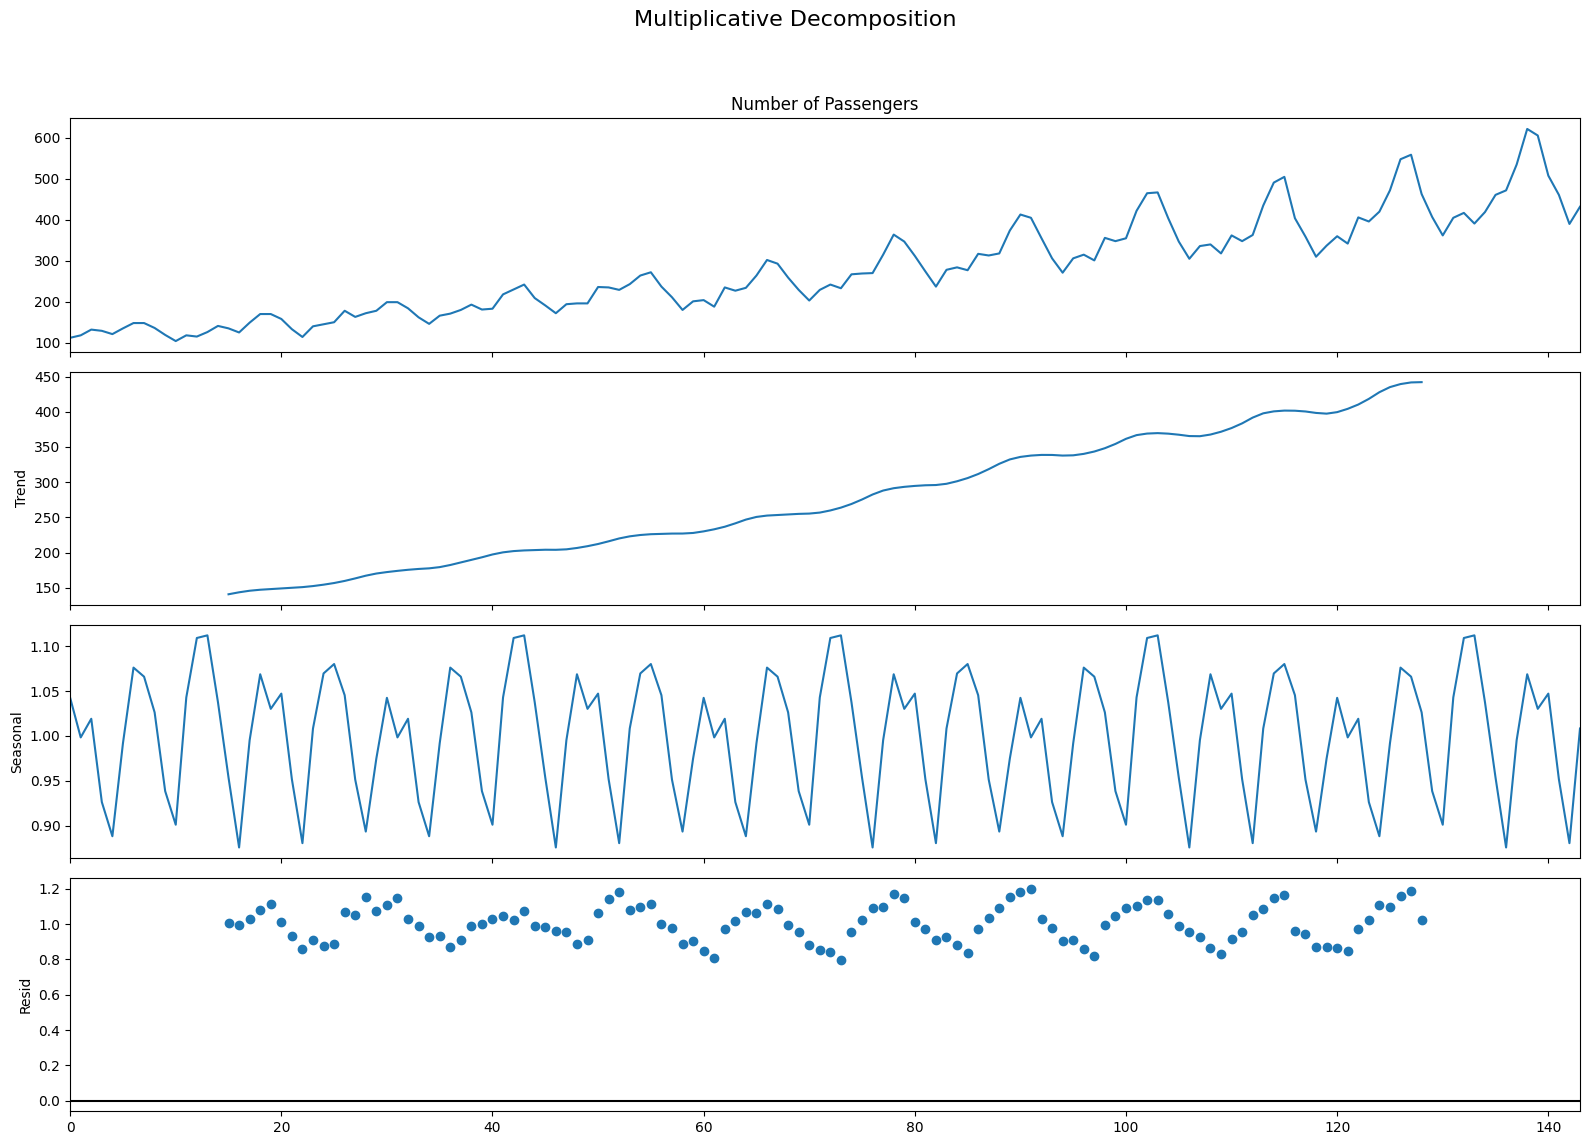

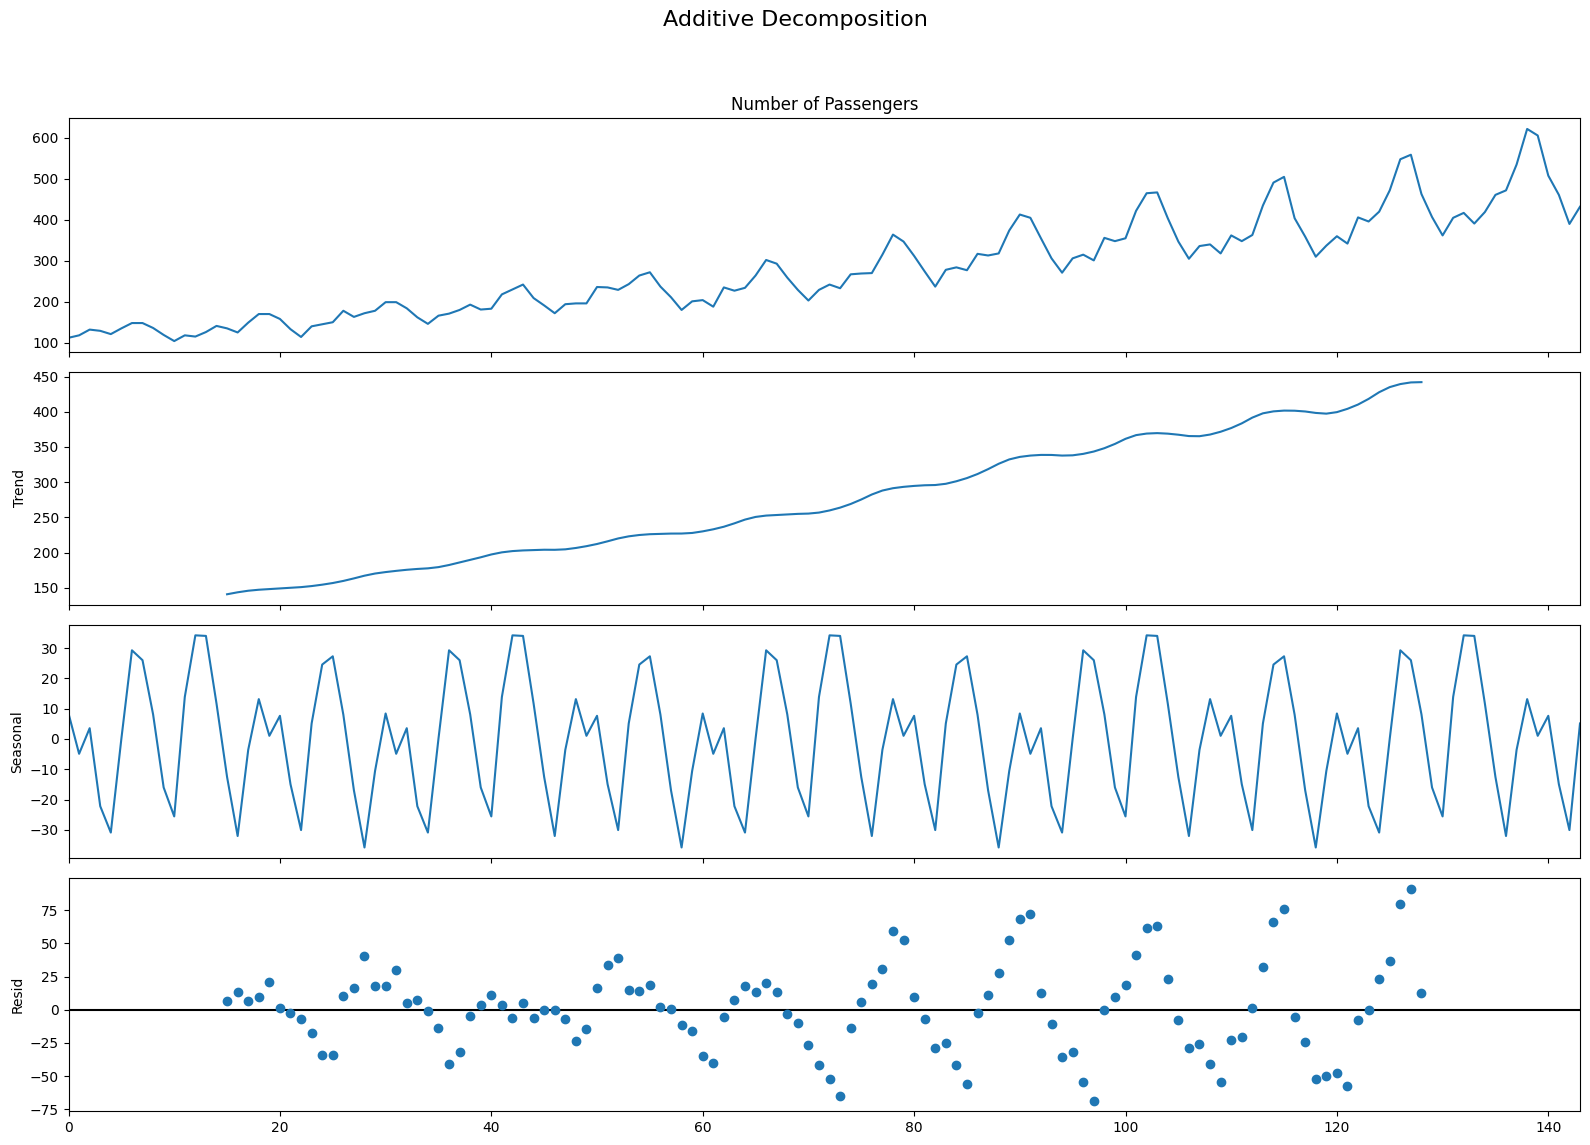

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

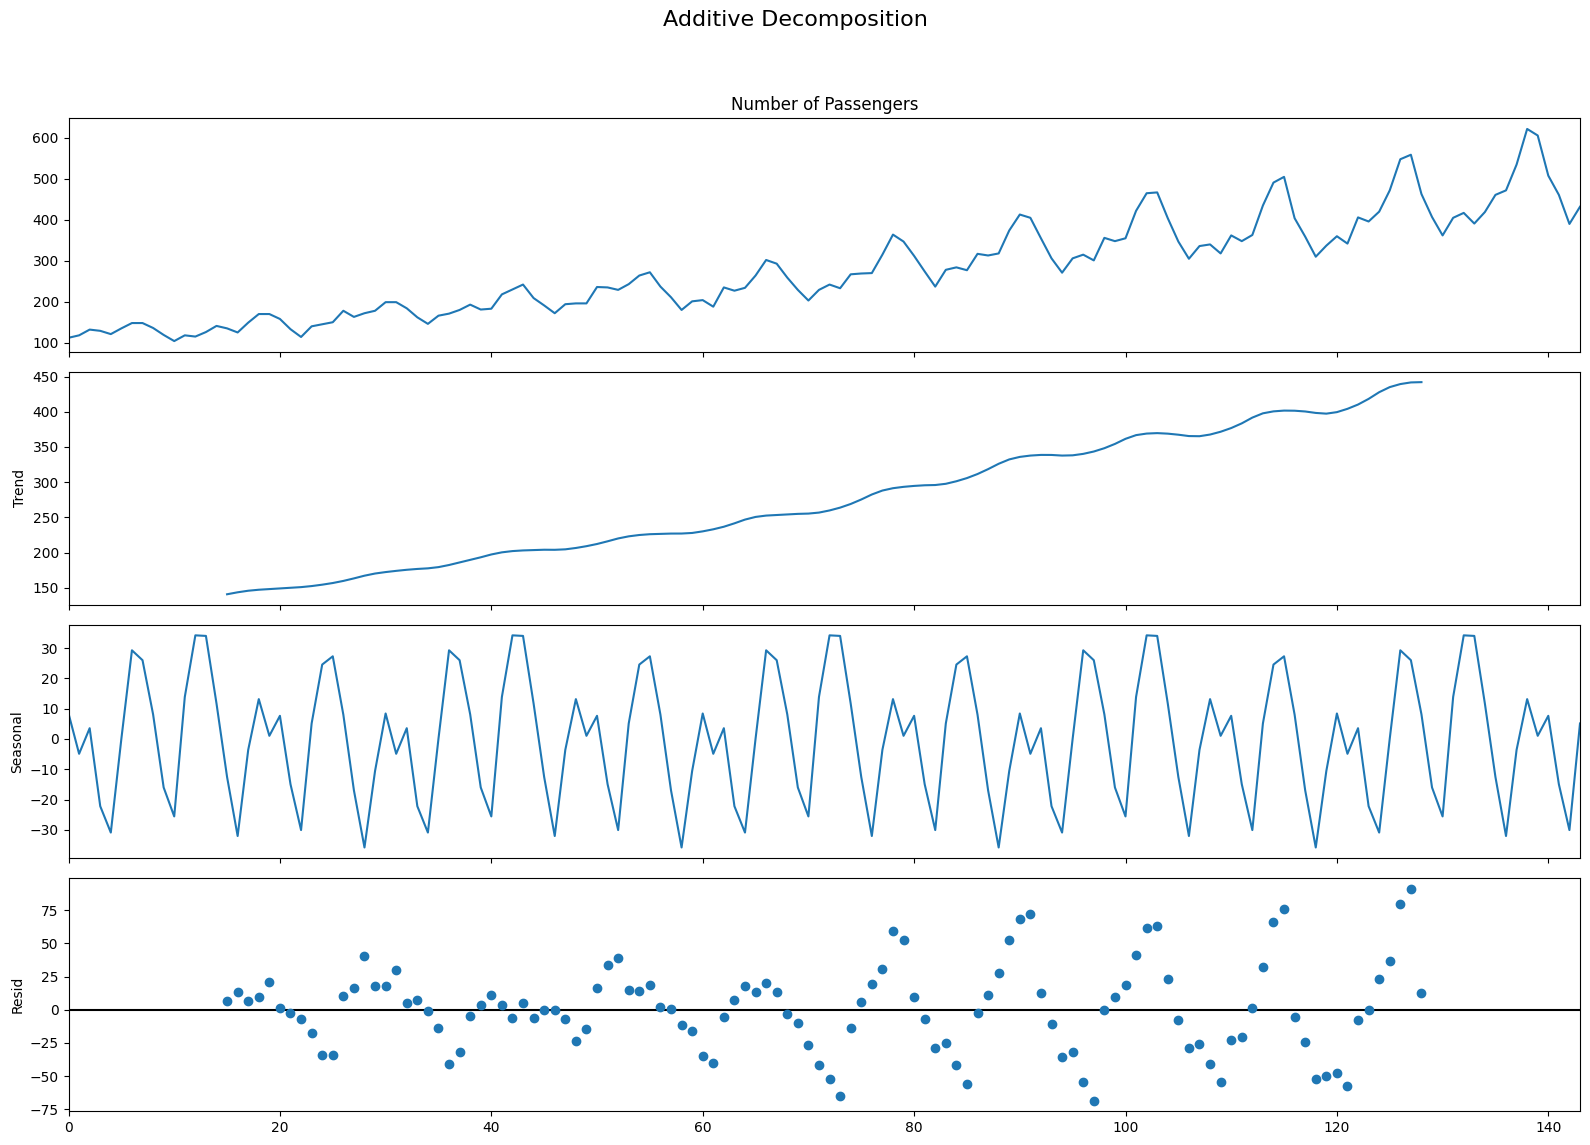

In [8]:
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()